# Collaborative filtering using Surprise Library

Project title: Automating literature reviews using recommender systems


Authors : Alarmelu PM, Akhila Bolisetty, Andrew Szeto

SurPRISE - stands for Simple Python RecommendatIon System Engine as quoted in the documentation of the library.
Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

http://surpriselib.com/
    
This library is very useful for creating simple recommendations using ready to use prediction algorithms such as
baseline algorithms, neighborhood algorithms and matrix factorization based algorithms.

This also helps quantatively compare these algorithms for our dataset and pick the best one for scaling and implementation.

In [4]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

# Prepare the dataset for Surprise library ingestion

In [9]:
#import the dataset with user profiles and ratings
df_in = pd.read_csv('sciencepapers_with_userprofiles.csv')

In [10]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              2294 non-null   int64  
 1   Area of interest  2294 non-null   object 
 2   Input             2294 non-null   object 
 3   title             2294 non-null   object 
 4   rating            2286 non-null   float64
 5   arxiv_id          2294 non-null   object 
 6   paperId           2294 non-null   object 
 7   created           2294 non-null   object 
 8   categories        2292 non-null   object 
 9   authors           2294 non-null   object 
 10  keywords          2294 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 197.3+ KB


In [11]:
#fill the missing rating values using the median value 3
df_in.rating = df_in.rating.fillna(3).astype(int)

In [12]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              2294 non-null   int64 
 1   Area of interest  2294 non-null   object
 2   Input             2294 non-null   object
 3   title             2294 non-null   object
 4   rating            2294 non-null   int64 
 5   arxiv_id          2294 non-null   object
 6   paperId           2294 non-null   object
 7   created           2294 non-null   object
 8   categories        2292 non-null   object
 9   authors           2294 non-null   object
 10  keywords          2294 non-null   object
dtypes: int64(2), object(9)
memory usage: 197.3+ KB


In [13]:
#getting the columns in a list format
df_in.columns

Index(['user', 'Area of interest', 'Input', 'title', 'rating', 'arxiv_id',
       'paperId', 'created', 'categories', 'authors', 'keywords'],
      dtype='object')

In [14]:
rating_cols = ['user','paperId','rating'] #columns needed for surprise library algorithms

In [15]:
rating =  df_in[rating_cols]
rating

,user,paperId,rating
0,1,7051457,5
1,1,10050214,1
2,1,7051453,3
3,1,7043501,2
4,1,8092686,3
...,...,...,...
2289,222,12023461,3
2290,222,10074602,3
2291,222,180609339,2
2292,222,1610065,2


# Suprise library implementation and analysis of the models with our dataset

In [17]:
#data format compatible with suprise library
#read the data using the Reader 
# documentation - https://surprise.readthedocs.io/en/stable/getting_started.html#load-a-custom-dataset

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_in[['user','paperId','rating']], reader)

Suprise prediction algorithm package:
As quoted in the surprise documentation

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html#module-surprise.prediction_algorithms

The prediction_algorithms package includes the prediction algorithms available for recommendation.

The available prediction algorithms are:

random_pred.NormalPredictor	Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.


baseline_only.BaselineOnly	Algorithm predicting the baseline estimate for given user and item.


knns.KNNBasic	A basic collaborative filtering algorithm.


knns.KNNWithMeans	A basic collaborative filtering algorithm, taking into account the mean ratings of each user.


knns.KNNWithZScore	A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.


knns.KNNBaseline	A basic collaborative filtering algorithm taking into account a baseline rating.


matrix_factorization.SVD	The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization [salakhutdinov2008a] (see note below)..


matrix_factorization.SVDpp	The SVD++ algorithm, an extension of SVD taking into account implicit ratings.


matrix_factorization.NMF	A collaborative filtering algorithm based on Non-negative Matrix Factorization.
slope_one.SlopeOne	A simple yet accurate collaborative filtering algorithm.


co_clustering.CoClustering	A collaborative filtering algorithm based on co-clustering.


In [25]:
#a cleaner way to benchmark all the algorithms in one place is to loop through the list of the models
models = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

In [26]:
model_scores = []
#using k fold cross validation where k=4 as we did not split test and train sets

for i in models:
    #print(i)
    score = cross_validate(i, data, measures=['RMSE'], cv=3, verbose=False)
    #print(score)
    
    tmp_df = pd.DataFrame.from_dict(score).mean(axis=0) #mean on axis 0 will be the mean of all the rows in each column
    tmp_df = tmp_df.append(pd.Series([str(i).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    model_scores.append(tmp_df)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [27]:
benchmarking_results = pd.DataFrame(model_scores).set_index('Algorithm').sort_values('test_rmse')
benchmarking_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.489644,0.003319,0.006978
KNNBasic,0.530911,0.001076,0.006187
SlopeOne,0.559549,0.005834,0.011946
KNNWithMeans,0.642481,0.002958,0.006314
NMF,0.703808,0.091013,0.002839
KNNWithZScore,0.723439,0.008812,0.007993
SVDpp,0.839546,0.193377,0.009942
SVD,0.945545,0.070327,0.003086
BaselineOnly,0.963611,0.002503,0.002374


we can see that kNN algorithms work really well with our dataset. 
KNNBaseline and KNNBasic has the most promising RMSE of the lot. Based on this initial analysis, we dived deeper into the kNN algorithms to try different variations of the model and see if we can improve any of the other kNN models to get better results than the basic model.


# KNN model implementation and analysis

In this analysis, we will run the 4 KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline with cross validation. Then we will tune the hyperparamaters of the models to get the best RMSE

In [48]:
#other necessary imports

from surprise import Dataset, Reader

from surprise.similarities import \
    cosine, msd, pearson, pearson_baseline
from surprise.prediction_algorithms.knns import \
    KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import \
    train_test_split, GridSearchCV, cross_validate

from surprise import accuracy
from surprise.model_selection import KFold

import numpy as np

In [18]:
# using the same data we used at the start of this analysis
#split the data into train and test sets of 80% and 20% respectively
train, test = train_test_split(data, test_size=0.2)

Inner id - iid in surprise library

Surprise uses a concept called the inner ids -> iids 
Documentation - https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=inner%20id#what-are-raw-and-inner-ids


Raw ids are ids as defined in a rating file or in a pandas dataframe. They can be strings or numbers. Note though that if the ratings were read from a file which is the standard scenario, they are represented as strings. This is important to know if you’re using e.g. predict() or other methods that accept raw ids as parameters.

On training set creation, each raw id is mapped to a unique integer called inner id, which is a lot more suitable for Surprise to manipulate. Conversions between raw and inner ids can be done using the to_inner_uid(), to_inner_iid(), to_raw_uid(), and to_raw_iid() methods of the trainset.

In [30]:
train_iids = list(train.all_items())
iid_converter = lambda x: train.to_raw_iid(x)
train_raw_iids = list(map(iid_converter, train_iids))

In [31]:
# we are using the trainsetfull to save distance metrics
trainsetfull = data.build_full_trainset()
print('Number of users: ', trainsetfull.n_users, '\n')
print('Number of items: ', trainsetfull.n_items, '\n')

Number of users:  222 

Number of items:  592 



With this our data preparation to analyze the KNN models is done. The next steps are analyzing the basis for similarity calculations and move on to the model building.

# Model building, hyperparameter tuning and analysis

KNN models without baseline:
    
    
What is a model baseline?

A baseline model is a simple implementation where in it uses heuristics, simple summary statistics or machine learning.
We generally first create a baseline and then try and improve on it to get improved metrics



In our case,
we will first implement KNNBasic,KNNwithMeans,KNNWithZScore with cross validation to see the baseline scores.

We will then pick the best model and train it to check the rmse

In [83]:
#similarity options
#msd,cosine,pearson,peasron_baseline similarities will be compared 
#based on the items as the user_based option is set to False.

msd = {'name':'MSD', 'user_based':False}
cos = {'name':'cosine', 'user_based':False}
pearson = {'name':'pearson', 'user_based':False}
pearson_baseline = {'name': 'pearson_baseline','user_based':False, 'shrinkage': 100}

In [35]:
similarity_coeff = [msd,cos,pearson,pearson_baseline]
ks = [1,2,3]

In [54]:
# KNNWithMeans
#column names = ['Algorithm','Similarity','train RMSE','test RMSE']
scores_knnbasic = []
for similarity in similarity_coeff:
    
    for k in ks:
        #print('similarity :', similarity)
        #print('k value: ',k)
        
        algo = KNNBasic(k = k, sim_options = similarity)
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, return_train_measures=True);
        #print(results)
        #take the results and store it in the scores_knnbasic list
        tmp_dict = {'algorithm':'KNNBasic','Similarity':similarity['name'],'k':k,'train RMSE': np.mean(results['train_rmse']),'test RMSE': np.mean(results['test_rmse'])}
        scores_knnbasic.append(tmp_dict)
        

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

In [57]:
scores_knnbasic = pd.DataFrame(scores_knnbasic)
scores_knnbasic

,algorithm,Similarity,k,train RMSE,test RMSE
0,KNNBasic,MSD,1,0.074629,0.785859
1,KNNBasic,MSD,2,0.157064,0.838627
2,KNNBasic,MSD,3,0.235883,0.821340
3,KNNBasic,cosine,1,1.329253,1.397355
4,KNNBasic,cosine,2,1.098542,1.215896
5,KNNBasic,cosine,3,1.026217,1.192359
6,KNNBasic,pearson,1,0.171616,1.160322
7,KNNBasic,pearson,2,0.153312,1.161881
8,KNNBasic,pearson,3,0.156887,1.145806
9,KNNBasic,pearson_baseline,1,0.073403,1.027164


In [59]:
# KNNWithZScore
scores_knnzscore = []
for similarity in similarity_coeff:
    
    for k in ks:
        #print('similarity :', similarity)
        #print('k value: ',k)
        
        algo = KNNWithZScore(k = k, sim_options = similarity)
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, return_train_measures=True);
        #print(results)
        #take the results and store it in the scores_knnbasic list
        tmp_dict = {'algorithm':'KNNWithZScore','Similarity':similarity['name'],'k':k,'train RMSE': np.mean(results['train_rmse']),'test RMSE': np.mean(results['test_rmse'])}
        scores_knnzscore.append(tmp_dict)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

In [60]:
scores_knnzscore = pd.DataFrame(scores_knnzscore)
scores_knnzscore

,algorithm,Similarity,k,train RMSE,test RMSE
0,KNNWithZScore,MSD,1,0.371554,0.769120
1,KNNWithZScore,MSD,2,0.334879,0.716350
2,KNNWithZScore,MSD,3,0.321293,0.713074
3,KNNWithZScore,cosine,1,0.569671,0.800760
4,KNNWithZScore,cosine,2,0.489074,0.759207
5,KNNWithZScore,cosine,3,0.442674,0.710270
6,KNNWithZScore,pearson,1,0.098576,0.645603
7,KNNWithZScore,pearson,2,0.098398,0.669194
8,KNNWithZScore,pearson,3,0.106120,0.699809
9,KNNWithZScore,pearson_baseline,1,0.069463,0.682994


In [67]:
df = pd.concat([scores_knnbasic,scores_knnzscore],ignore_index=True)
df['model'] = df['algorithm'] + "_" + df['Similarity'] + "_"+ df['k'].astype(str)

In [70]:
df.sort_values(by = 'test RMSE', inplace = True)
df

,algorithm,Similarity,k,train RMSE,test RMSE,model
18,KNNWithZScore,pearson,1,0.098576,0.645603,KNNWithZScore_pearson_1
19,KNNWithZScore,pearson,2,0.098398,0.669194,KNNWithZScore_pearson_2
23,KNNWithZScore,pearson_baseline,3,0.056269,0.681811,KNNWithZScore_pearson_baseline_3
21,KNNWithZScore,pearson_baseline,1,0.069463,0.682994,KNNWithZScore_pearson_baseline_1
22,KNNWithZScore,pearson_baseline,2,0.053540,0.685416,KNNWithZScore_pearson_baseline_2
20,KNNWithZScore,pearson,3,0.106120,0.699809,KNNWithZScore_pearson_3
17,KNNWithZScore,cosine,3,0.442674,0.710270,KNNWithZScore_cosine_3
14,KNNWithZScore,MSD,3,0.321293,0.713074,KNNWithZScore_MSD_3
13,KNNWithZScore,MSD,2,0.334879,0.716350,KNNWithZScore_MSD_2
16,KNNWithZScore,cosine,2,0.489074,0.759207,KNNWithZScore_cosine_2


<AxesSubplot:title={'center':'kNN Scores with varying K and similarity'}, xlabel='model'>

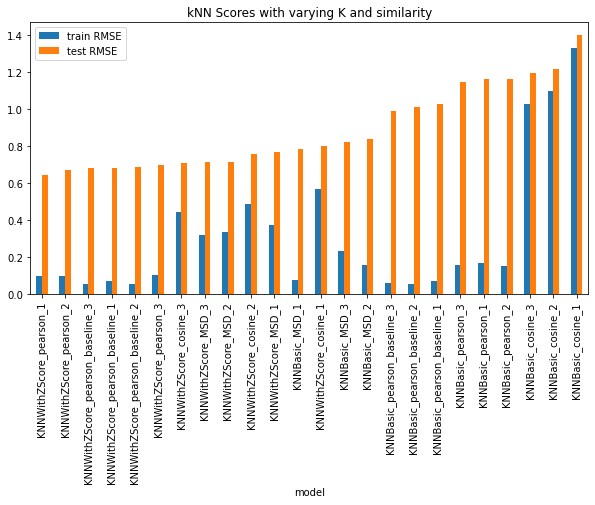

In [69]:
import matplotlib.pyplot as plt
df.sort_values(by = 'test RMSE', inplace = True)
df.plot(x="model", y=["train RMSE", "test RMSE"], kind="bar", figsize=(10, 5),title='kNN Scores with varying K and similarity')

# Best model without baseline

In [71]:
#KNNWithZScore	pearson	1	0.098576	0.645603	

In [80]:
best_k = 3
best_similarity = {'name':'pearson', 'user_based':False}
best_model = KNNWithZScore(k = best_k, sim_options = best_similarity)
best_model.fit(train)
predictions = best_model.test(test)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5785


0.5784927478448766

# KNN with baseline algorithms


Up next we will follow a similar process to identify the best baseline model. 
Baselines can be identified with SGD and ALS methods
Quoted from the documentation:https://surprise.readthedocs.io/en/stable/prediction_algorithms.html

Baselines can be estimated in two different ways:

Using Stochastic Gradient Descent (SGD).
Using Alternating Least Squares (ALS).
You can configure the way baselines are computed using the bsl_options parameter passed at the creation of an algorithm. This parameter is a dictionary for which the key 'method' indicates the method to use. Accepted values are 'als' (default) and 'sgd'. Depending on its value, other options may be set. 


for SGD:

'reg': The regularization parameter of the cost function that is optimized, corresponding to 𝜆1 in [Koren:2010]. Default is 0.02.
'learning_rate': The learning rate of SGD, corresponding to 𝛾 in [Koren:2010]. Default is 0.005.
'n_epochs': The number of iteration of the SGD procedure. Default is 20.
Hyperparameters to tune here:


In [6]:
#similarity options
msd = {'name':'MSD', 'user_based':False}
cos = {'name':'cosine', 'user_based':False}
pearson = {'name':'pearson', 'user_based':False}
pearson_baseline = {'name': 'pearson_baseline','user_based':False, 'shrinkage': 100}

In [85]:
#msd,cosine,pearson,peasron_baseline similarities will be compared 
#based on the items as the user_based option is set to False.
# testing by varying values of k and keeping learning rate at 0.00005

algo = KNNBaseline(
    k = 3, 
    sim_options = pearson_baseline, 
    bsl_options = {'method': 'sgd','learning_rate': .00005,}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9931


0.9931346752941891

In [86]:
algo = KNNBaseline(
    k = 2, 
    sim_options = pearson_baseline, 
    bsl_options = {'method': 'sgd','learning_rate': .00005,}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9903


0.9903469388648218

In [87]:
algo = KNNBaseline(
    k = 1, 
    sim_options = pearson_baseline, 
    bsl_options = {'method': 'sgd','learning_rate': .00005,}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0026


1.0025559421796566

In [88]:
sgd_baseline = [
    {'method':'sgd', 'reg': 0.02, 'learning_rate': 0.005},
    {'method':'sgd', 'reg': 0.05, 'learning_rate': 0.005},
    {'method':'sgd', 'reg': 0.1, 'learning_rate': 0.005},
    {'method':'sgd', 'reg': 0.02, 'learning_rate': 0.01},
    {'method':'sgd', 'reg': 0.05, 'learning_rate': 0.01},
    {'method':'sgd', 'reg': 0.1, 'learning_rate': 0.01}
]

In [117]:
#column names = ['Algorithm','Similarity','train RMSE','test RMSE']
scores_knnbaseline_sgd = []

#checking using cross validation method
for i in sgd_baseline:
    for k in ks:
        algo = KNNBaseline(k = k, sim_options = pearson_baseline, bsl_options = i)
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, return_train_measures=True);
        #print(results)
        #take the results and store it in the scores_knnbasic list
        tmp_dict = {'algorithm':'KNNBaseline_sgd','regularization':i['reg'],'learning rate':i['learning_rate'],'k':k,'train RMSE': np.mean(results['train_rmse']),'test RMSE': np.mean(results['test_rmse'])}
        scores_knnbaseline_sgd.append(tmp_dict)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

In [118]:
scores_knnbaseline_sgd = pd.DataFrame(scores_knnbaseline_sgd)
scores_knnbaseline_sgd.sort_values(by = 'test RMSE', inplace = True)
scores_knnbaseline_sgd

,algorithm,regularization,learning rate,k,train RMSE,test RMSE
9,KNNBaseline_sgd,0.02,0.010,1,0.075601,0.765418
16,KNNBaseline_sgd,0.10,0.010,2,0.051935,0.768898
10,KNNBaseline_sgd,0.02,0.010,2,0.054145,0.773562
14,KNNBaseline_sgd,0.05,0.010,3,0.057023,0.774306
13,KNNBaseline_sgd,0.05,0.010,2,0.053454,0.774909
15,KNNBaseline_sgd,0.10,0.010,1,0.073769,0.780179
12,KNNBaseline_sgd,0.05,0.010,1,0.063691,0.785762
17,KNNBaseline_sgd,0.10,0.010,3,0.060724,0.791136
11,KNNBaseline_sgd,0.02,0.010,3,0.055255,0.794050
6,KNNBaseline_sgd,0.10,0.005,1,0.073788,0.834466


<AxesSubplot:title={'center':'kNN baseline SGD Scores with varying reg and learning rate'}, xlabel='model'>

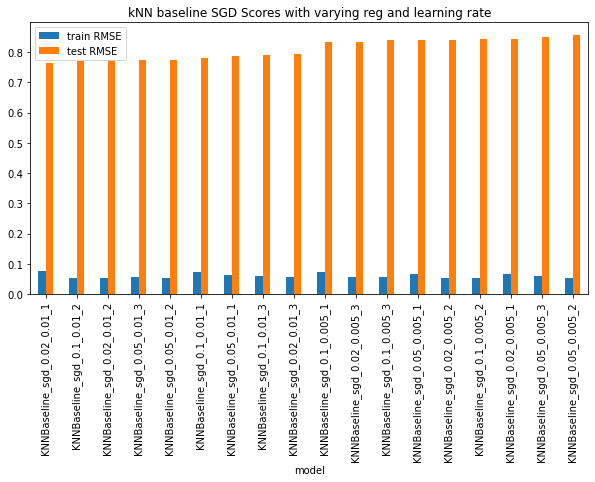

In [142]:
scores_knnbaseline_sgd['model'] =scores_knnbaseline_sgd['algorithm']+'_'+ scores_knnbaseline_sgd['regularization'].astype(str) + "_" + scores_knnbaseline_sgd['learning rate'].astype(str) + "_"+ scores_knnbaseline_sgd['k'].astype(str)

import matplotlib.pyplot as plt

scores_knnbaseline_sgd.plot(x="model", y=["train RMSE", "test RMSE"], kind="bar", figsize=(10, 5),title='kNN baseline SGD Scores with varying reg and learning rate')

In [1]:
#best model KNNBaseline_sgd	0.02	0.010	1	0.075601	0.765418

In [2]:
best_reg_sgd = 0.02
best_learning_rate_sgd = 0.010
best_sgd_k=1

In [19]:
best_knn_baseline_sgd = KNNBaseline(
    k = best_sgd_k, 
    sim_options = pearson_baseline,
    bsl_options = {
        'method':'sgd', 'reg': best_reg_sgd,  'learning_rate': best_learning_rate_sgd}
    )
best_knn_baseline_sgd.fit(train)
predictions = best_knn_baseline_sgd.test(test)
accuracy.rmse(predictions)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7235


0.7235371801327227

# Tuning using Alternating least squares


ALS is a two-step optimization process to solve for sparse data.
First it fixes the rows for a factorized matrix and then uses the row to fix columns.

With als, there are two that we can tune: reg_i and reg_u.





'reg_i': The regularization parameter for items. Corresponding to 𝜆2 in [Koren:2010]. Default is 10.


'reg_u': The regularization parameter for users. Corresponding to 𝜆3 in [Koren:2010]. Default is 15.


'n_epochs': The number of iteration of the ALS procedure. Default is 10. Note that in [Koren:2010], what is described is a single iteration ALS process.

In [113]:
#varying the reg_i and reg_u keeping k at 3
#similarity at pearson_baseline

In [108]:
algo = KNNBaseline(
    k = 3, sim_options = pearson_baseline, 
    bsl_options = {'method': 'als','reg_i': 10, 'reg_u': 15}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8191


0.8191176514033616

In [110]:
algo = KNNBaseline(
    k = 3, sim_options = pearson_baseline, 
    bsl_options = {'method': 'als','reg_i': 20, 'reg_u': 30}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8808


0.880814850382178

In [112]:
algo = KNNBaseline(
    k = 3, sim_options = pearson_baseline, 
    bsl_options = {'method': 'als','reg_i': 40, 'reg_u': 60}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9311


0.9311436217620906

In [114]:
algo = KNNBaseline(
    k = 3, sim_options = pearson_baseline, 
    bsl_options = {'method': 'als','reg_i': 80, 'reg_u': 120}
            )
algo.fit(train)
predictions = algo.test(test)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9687


0.9686742079166937

In [116]:
als_baseline = [
    {'method':'als', 'reg_i': 20, 'reg_u': 30},
    {'method':'als', 'reg_i': 40, 'reg_u': 60},
    {'method':'als', 'reg_i': 20, 'reg_u': 30},
    {'method':'als', 'reg_i': 40, 'reg_u': 60}
]

In [120]:
scores_knnbaseline_als=[]
for i in als_baseline:
    for k in ks:
        algo = KNNBaseline(k = k, sim_options = pearson_baseline, bsl_options = i)
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, return_train_measures=True);
        #print(results)
        #take the results and store it in the scores_knnbasic list
        tmp_dict = {'algorithm':'KNNBaseline_als','regularization_i':i['reg_i'],'regularization_u':i['reg_u'],'k':k,'train RMSE': np.mean(results['train_rmse']),'test RMSE': np.mean(results['test_rmse'])}
        scores_knnbaseline_als.append(tmp_dict)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [121]:
scores_knnbaseline_als = pd.DataFrame(scores_knnbaseline_als)
scores_knnbaseline_als.sort_values(by = 'test RMSE', inplace = True)
scores_knnbaseline_als

,algorithm,regularization_i,regularization_u,k,train RMSE,test RMSE
8,KNNBaseline_als,20,30,3,0.057350,0.910142
2,KNNBaseline_als,20,30,3,0.056414,0.913836
6,KNNBaseline_als,20,30,1,0.068604,0.930681
7,KNNBaseline_als,20,30,2,0.057223,0.931621
0,KNNBaseline_als,20,30,1,0.079207,0.939833
1,KNNBaseline_als,20,30,2,0.053781,0.939842
10,KNNBaseline_als,40,60,2,0.058216,0.952319
5,KNNBaseline_als,40,60,3,0.062698,0.962818
4,KNNBaseline_als,40,60,2,0.058973,0.967163
11,KNNBaseline_als,40,60,3,0.055268,0.970400


<AxesSubplot:title={'center':'kNN Scores with varying K and similarity'}, xlabel='model'>

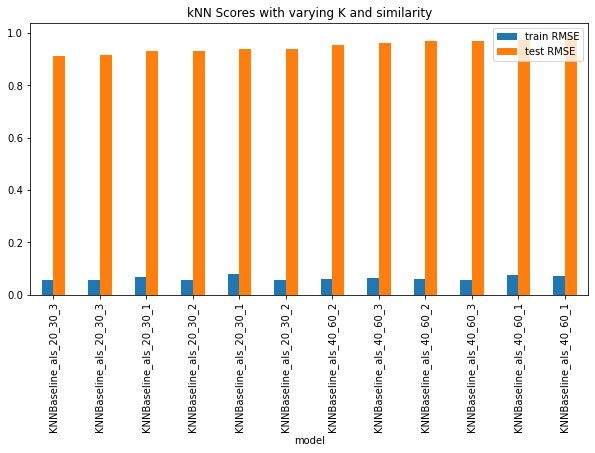

In [140]:
scores_knnbaseline_als['model'] = scores_knnbaseline_als['algorithm']+'_'+scores_knnbaseline_als['regularization_i'].astype(str) + "_" + scores_knnbaseline_als['regularization_u'].astype(str) + "_"+ scores_knnbaseline_als['k'].astype(str)
scores_knnbaseline_als.plot(x="model", y=["train RMSE", "test RMSE"], kind="bar", figsize=(10, 5),title='kNN Scores with varying K and similarity')

In [131]:
#KNNBaseline_als	20	30	3	0.057350	0.910142
best_reg_i_als = 20
best_reg_u_als = 30
best_k = 3

In [136]:
best_knn_baseline_als = KNNBaseline(
    k = best_k, 
    sim_options = pearson_baseline,
    bsl_options = {
        'method':'als', 'reg_i':best_reg_i_als, 'reg_u': best_reg_u_als }
    )
best_knn_baseline_als.fit(train)
predictions = best_knn_baseline_als.test(test)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8808


0.880814850382178